reference: https://github.com/krasserm/machine-learning-notebooks

### Linear Regression

This exercise is described in [ex1](https://github.com/krasserm/machine-learning-notebooks/blob/master/data/ml-ex1/ex1.pdf).pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Linear regression with one variable

In [3]:
# load data from CSV file
# - column 1: population(x)
# - column 2: profit(y)
data = np.loadtxt('data/ml_ex01/ex1data1.txt', delimiter=',')

In [4]:
# Separate features(x) from target(y)
X, y = np.hsplit(data, 2)

In [5]:
# Number of examples
m = y.size

In [6]:
# Fit a linear regression model (without regularization)
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [7]:
# Obtain coeefficients theta0 and theta 1 from model
theta0, theta1 = model.intercept_, model.coef_[0]
theta0, theta1

(array([-3.89578088]), array([1.19303364]))

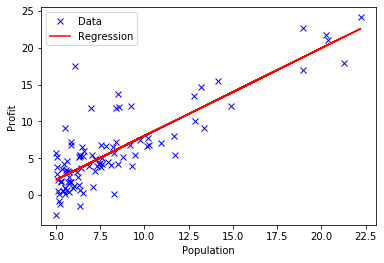

In [8]:
# Plot data and regression line
plt.plot(X, y, 'bx', label = 'Data')
plt.plot(X, model.predict(X), 'r-', label='Regression')  #'r' = red
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()

In [9]:
# Training mean squared error
np.mean((model.predict(X) - y)**2)

8.953942751950358

In [10]:
# Training Score
model.score(X,y)

0.7020315537841397

In [11]:
# Predict profit for population of 35.000 and 70.000
model.predict(np.array([[3.5], [7.0]])) * 10000

array([[ 2798.36876352],
       [44554.54631015]])

See also this [Stackoverflow](https://stackoverflow.com/questions/34170618/normal-equation-and-numpy-least-squares-solve-methods-difference-in-regress) entry for the following calculations:

In [12]:
# LineaGression above internally added a column vector of 1s.
# For the following calculations, this must be done explicitly
X = np.c_[np.ones(m), X]

In [13]:
# Compute least-squares solution with np.linalg.lstsq.
# This is what LinearRegression actually does under the hood
Theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [14]:
# Solve analytically (without explicit inverse)
Theta = np.linalg.lstsq(X,y)[0]
Theta

C:\Users\Norto\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[-3.89578088],
       [ 1.19303364]])

In [15]:
# Solve birnak equation (explicit inverse)
Theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [16]:
# Solve normal equation (explitict pseudo-inverse)
Theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [17]:
# Cost function (mean squared error)

def cost(X, y, Theta):
    diff = X.dot(Theta) - y
    return np.sum(diff * diff, axis = 0) / y.size

Text(0.5, 1.0, 'Cost Function')

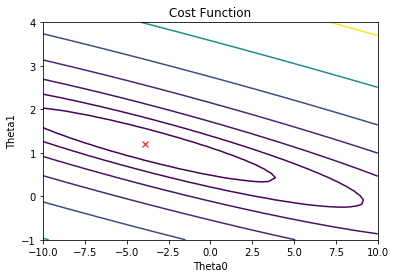

In [18]:
# Create a 50*50 grid for Theta0 and Theta1 ranges
Theta_grid = np.mgrid[-10: 10: 50j, -1: 4: 50j]

# Theta values in an array of shape (2500, 2)
Thetas = np.c_[Theta_grid[0].ravel(), Theta_grid[1].ravel()]

# Compute costs on grid points
costs = cost(X, y, Thetas.T)

# Cost values reshaped to grid
cost_grid = costs.reshape(Theta_grid[0].shape)

# Contour plot of cost function
plt.contour(Theta_grid[0], Theta_grid[1], cost_grid, levels = [20, 40, 80, 160, 320, 640, 1280])

# Plot optimum
plt.plot(Theta[0], Theta[1], 'rx')

# Title and axis labels
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Cost Function')

### Linear regression with multiple variables

In [19]:
# load data from CSV file
# - column 1: house size in feet**2 (x1)
# - column 2: number of bedroom (x2)
# - column 3: house price (y)

data = np.loadtxt('data/ml_ex01/ex1data2.txt', delimiter = ',')

In [20]:
# Separate features (x1, x2) from target(y)
X, y = np.hsplit(data, np.array([2]))

In [21]:
# Number of examples 
m = y.size

In [22]:
# Pipeline components 
scaler = StandardScaler()
regr = LinearRegression()

# Pipeline of feature scaler and linear regressor
model = Pipeline([('scaler', scaler), ('regr', regr)])

In [23]:
# Run linear regression on scaled features
model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('regr', LinearRegression())])

In [ ]:
# Create a grid from feature min and max values
grid_range = np.vstack([X.min(axis=0), X.max(axis=0)])
grid = np.meshgrid(grid_range[:,0], grid_range[:,1])

# Compute predictions from grid values
X_grid = np.c_[grid[0].ravel(),grid[1].ravel()]